In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#-------------------------------------
# Begin Function Declarations
#-------------------------------------

In [3]:
# For Even Junctions

def EvenArrayOfJunctions(sigma, numOfJunctions, width, arrayJ = []): # Generates an array of junctions given some standard deviation & mean width
    # Necessary Declarations
    junctionCenter = 1/(numOfJunctions - 1) # Declares the middle of the junction assuming zero junction width
    arrOfWidthsDiv2 = np.zeros(numOfJunctions//2)
    arrOfJunctions =  np.zeros(numOfJunctions * 2)
    arrayOfWidths = np.zeros(numOfJunctions)

    # Evolution of the squared terms for standard deviation for even junctions, derived by me. (Assuming linear fit)
    delta = 4 / (numOfJunctions + 2) * sigma**2
    # If standard deviation is 0 and the inputted array is custom, return the array
    if sigma == 0 and len(arrayJ) != 0:
        return arrayJ

    # Creates the list of the terms generated by the delta, without accounting for the mean
    # NOT THE TRUE STANDARD DEVIATION - Need to account for both positives and minuses, this is just positive
    for i in range(1, numOfJunctions//2 + 1):
        arrOfWidthsDiv2[i - 1] = np.sqrt(i * delta)
    arrayOfWidths = np.concatenate((np.flip(arrOfWidthsDiv2), arrOfWidthsDiv2))
    # If the user inputted a custom array
    if (len(arrayJ) != 0):
        arrOfJunctions = np.array(arrayJ)
        arrOfJunctions[1] = arrayJ[1] + arrOfWidthsDiv2[0] # Intializes the first junction, necessary otherwise the for-loop breaks
        # For each junction in the inputted array
        for k in range(2, arrOfJunctions.size - 2, 2):
            arrOfJunctions[k] = arrayJ[k] - (arrayOfWidths[k//2]) # Even "expansion" of the junctions
            arrOfJunctions[k + 1] = arrayJ[k + 1] + (arrayOfWidths[k//2]) # Even "expansion" of the junctions
        arrOfJunctions[-2] = arrayJ[-2] - arrOfWidthsDiv2[-1] # Hard sets the last junction, also necessary otherwise for-loop breaks
        arrOfJunctions[-1] = 1 # Hard sets the last junction, not accounted for in the for-loop
    else:
        correctional_last_term = 0.0001 # Necessary for the last junction due to it being an odd # of junctions
        arrOfJunctions[1] = width + arrayOfWidths[0] # Intializes the first junction, necessary otherwise the for-loop breaks
        for k in range(2, arrOfJunctions.size - 2, 2):
            arrOfJunctions[k] = k//2 * junctionCenter - (width + arrayOfWidths[k//2]) # Even "expansion" of the junctions
            arrOfJunctions[k + 1] = k//2 * junctionCenter + (width + arrayOfWidths[k//2]) # Even "expansion" of the junctions
        arrOfJunctions[-2] = 1 - (arrayOfWidths[-1] + correctional_last_term) # Hard sets the last junction, also necessary otherwise for-loop breaks
        arrOfJunctions[-1] = 1 # Hard sets the last junction, not accounted for in the for-loop
    return arrOfJunctions

In [4]:
# For Odd Junctions

def OddArrayOfJunctions(sigma, numOfJunctions, width, arrayJ = []): # Generates an array of junctions given some standard deviation & mean width
    # Necessary Declarations
    junctionCenter = 1/(numOfJunctions - 1) # Declares the middle of the junction assuming zero junction width
    arrOfWidthsDiv2 = np.zeros(numOfJunctions//2 + 1)
    arrOfJunctions = np.zeros(numOfJunctions * 2)

    # Evolution of the squared terms for standard deviation for odd junctions, derived by me. (Assuming linear fit)
    delta = (4 * numOfJunctions * sigma**2)/((numOfJunctions - 1) * (numOfJunctions + 1))

    # If standard deviation is 0 and the inputted array is custom, return the array
    if sigma == 0 and len(arrayJ) != 0:
        return arrayJ
    
    # Creates the list of the terms generated by the delta, without accounting for the mean
    # NOT THE TRUE STANDARD DEVIATION - Need to account for both positives and minuses, this is just positive
    for i in range(1, numOfJunctions//2 + 2):
        arrOfWidthsDiv2[i - 1] = np.sqrt((i-1) * delta)
    arrayOfWidths = np.concatenate((np.flip(arrOfWidthsDiv2[1:]), arrOfWidthsDiv2))
    # If the user inputted a custom array
    if (len(arrayJ) != 0):
        arrOfJunctions = np.array(arrayJ)
        arrOfJunctions[1] = arrayJ[1] + arrayOfWidths[0] # Intializes the first junction, necessary otherwise the for-loop breaks
        # For each junction in the inputted array
        for k in range(2, arrOfJunctions.size - 2, 2):
            arrOfJunctions[k] = arrayJ[k] - (arrayOfWidths[k//2]) # Even "expansion" of the junctions
            arrOfJunctions[k + 1] = arrayJ[k + 1] + (arrayOfWidths[k//2]) # Even "expansion" of the junctions
        arrOfJunctions[-2] = arrayJ[-2] - arrayOfWidths[-1] # Hard sets the last junction, also necessary otherwise for-loop breaks
        arrOfJunctions[-1] = 1
    else:
        correctional_last_term = 0.0001 # Necessary for the last junction due to it being an odd # of junctions
        arrOfJunctions[1] = width + arrayOfWidths[0] # Intializes the first junction, necessary otherwise the for-loop breaks
        for k in range(2, arrOfJunctions.size - 2, 2):
            arrOfJunctions[k] = k//2 * junctionCenter - (width + arrayOfWidths[k//2]) # Even "expansion" of the junctions
            arrOfJunctions[k + 1] = k//2 * junctionCenter + (width + arrayOfWidths[k//2]) # Even "expansion" of the junctions
        arrOfJunctions[-2] = 1 - (arrayOfWidths[-1] + correctional_last_term) # Hard sets the last junction, also necessary otherwise for-loop breaks
        arrOfJunctions[-1] = 1 # Hard sets the last junction, not accounted for in the for-loop
    return arrOfJunctions

In [5]:
# Parameters for Current -> Magnetic Field, Junction Locations, Critical Currents, Initial Phase Difference

# B is the integer value of flux quanta present in the SQUID

# current function, credit to Harshvardhan Mantry

def current(B, array, y): # This will give us the value of current flowing across the two superconductors depending on gamma (denoted as y), Magnetic Field B, and the location/widths of the junctions
    l=len(array)
    n=1+l/2
    i=0
    f=0
    x=y
    while(i<n):
        if(i==0): #Treating the first junction separately
            f+=np.sin(50*np.pi*B*array[0])*np.sin(x+50*np.pi*B*array[0])/(50*np.pi*B*array[0])
            # x+=2*50*np.pi*B*array[0]
        elif(i>0 and i<n-1):
            diff=array[2*i]-array[2*i-1] #The interior junctions
            f+=np.sin(50*np.pi*B*diff)*np.sin(x+2*50*np.pi*B*array[2*i-1]+50*np.pi*B*diff)/(50*np.pi*B*diff)
            # x+=2*50*np.pi*B*diff
        else:
            diff=1-array[2*i-1] #Last Junction
            # print(array[2*i-1])
            f+=np.sin(50*np.pi*B*diff)*np.sin(x+2*50*np.pi*B*array[2*i-1]+50*np.pi*B*diff)/(50*np.pi*B*diff)
            # x+=2*50*np.pi*B*diff
        i+=1
    return f

In [6]:
def ArrayOfJunctions(sigma, numOfJunctions, width, arrayJ):
    if (numOfJunctions % 2 == 0):
        return EvenArrayOfJunctions(sigma, numOfJunctions, width, arrayJ)
    else:
        return OddArrayOfJunctions(sigma, numOfJunctions, width, arrayJ)

# Prints out the # of junctions and the mean space occupied by the junctions
def stateOfArray(arrJ):
    state = []
    state.append(len(arrJ)//2)
    mean = 0
    for i in range(len(arrJ)//2):
        mean += (arrJ[2*i + 1] - arrJ[2*i])
    state.append(mean/(len(arrJ)//2))
    return state

# Prints out the percentage occupied by the non-current flowing areas
def meanOfArray(arrJ):
    percentage = 0
    for i in range(len(arrJ) // 2):
        percentage += (arrJ[2 * i + 1] - arrJ[2 * i]) / 2
    return  1 - percentage

# Checks whether junctions in the outputted array overlap with each other
def checkArray(arrJ):
    arr = arrJ.copy()
    if not np.array_equal(arr, sorted(arr)):
        if arr[1] > arr[2]:
            arr[1] = arr[2]
        for i in range(2, len(arr)//2 - 1):
            if arr[2 * i + 1] > arr[2 * i + 2]: # If the left end of the junction is greater than the right end of the adjacent junction
                arr[2*i + 1] = arr[2*i + 2]
            if arr[2 * i] > arr[2 * i + 1]: # If the left end of the junction is greater than the right end
                arr[2 * i] = arr[2 * i - 1]
            
    return arr

def maxCurrent(B, arrayJ): # Spits out the maximum current by varying the gauge invariant phase of the left end (free parameter) gamma
    Y=np.linspace(0, 2*np.pi, 150)
    dummyArray=[]
    for gamma in Y:
        dummyArray.append(current(B, arrayJ, gamma))
    return max(dummyArray)


In [7]:
#-------------------------------------
# End Function Declarations
#-------------------------------------

In [8]:
#-------------------------------------
# Begin Variable Declarations
#-------------------------------------

FluxField = np.linspace(-0.1, 0.1, 4000) # an array of Magnetic Fields ranging from 0 to 100 with 5000 total elements

#----------------------------------

arrayOfJunctions = []

# arrayOfJunctions = [0, 0.001, 0.3, 0.33, 0.9, 1]

#arrayOfJunctions = [0, 0.0001, 0.9999, 1]

# arrayOfJunctions = [0, 0.01, 0.03, 0.13, 0.14, 0.142, 0.16, 0.36, 0.38, 0.68, 0.681, 0.688, 0.7, 0.75, 0.77, 0.83, 0.84, 0.841, 0.89, 1]

# arrayOfJunctions = [0, 0.2, 0.4, 0.6, 0.9, 1]

arrayOfJunctions = [0, 0.2, 0.35, 0.6, 0.7, 0.8, 0.9, 1]

number_of_junctions = 2

#----------------------------------

IMaxPointSigma1 = []

IMaxPointSigma2 = []

IMaxPointSigma3 = []

junctionNumber = stateOfArray(arrayOfJunctions)[0] if (len(arrayOfJunctions) != 0) else number_of_junctions

meanWidth = stateOfArray(arrayOfJunctions)[1] if (len(arrayOfJunctions) != 0) else 0.0001


#----------------------------------

Sigma1 = 0

arraySigma1 = checkArray(ArrayOfJunctions(Sigma1, junctionNumber, meanWidth, arrayOfJunctions))

percentageSigma1 = meanOfArray(arraySigma1)

#----------------------------------

Sigma2 = 0.05

arraySigma2 = checkArray(ArrayOfJunctions(Sigma2, junctionNumber, meanWidth, arrayOfJunctions))

percentageSigma2 = meanOfArray(arraySigma2)

#----------------------------------

Sigma3 = 0.1

arraySigma3 = checkArray(ArrayOfJunctions(Sigma3, junctionNumber, meanWidth, arrayOfJunctions))

percentageSigma3 = meanOfArray(arraySigma3)



In [9]:
for f in FluxField:
    IMaxPointSigma1.append(maxCurrent(f, arraySigma1[1:-1])) # This integer represents the number of segments you want to cut each junction up into (the higher the number, the better the approximation)
print(arraySigma1)
for f in FluxField:
    IMaxPointSigma2.append(maxCurrent(f, arraySigma2[1:-1]))
print(arraySigma2)
for f in FluxField:
    IMaxPointSigma3.append(maxCurrent(f, arraySigma3[1:-1]))
print(arraySigma3)

# Normalizes Flux_Field to be for flux quanta
FluxField = FluxField * 50

[0, 0.2, 0.35, 0.6, 0.7, 0.8, 0.9, 1]
[0.         0.24082483 0.30917517 0.64082483 0.65917517 0.84082483
 0.84226497 1.        ]
[0.         0.26835034 0.26835034 0.68164966 0.61835034 0.78452995
 0.78452995 1.        ]


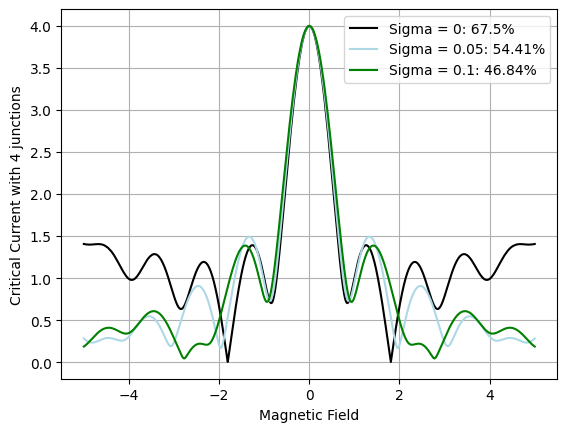

In [10]:
plt.figure(300)
plt.plot(FluxField, IMaxPointSigma1, 'black' , label="Sigma = " + str(Sigma1) + ": " + str(round(percentageSigma1 * 100, 2)) + "%")
plt.plot(FluxField, IMaxPointSigma2, '#ADD8E6', label="Sigma = " + str(Sigma2) + ": " + str(round(percentageSigma2 * 100, 2)) + "%")
plt.plot(FluxField, IMaxPointSigma3, 'green', label="Sigma = " + str(Sigma3) + ": " + str(round(percentageSigma3 * 100, 2)) + "%")
plt.legend(loc="upper right", frameon=True)
plt.xlabel('Magnetic Field')
plt.ylabel('Critical Current with ' + str(junctionNumber) + ' junctions')  
# plt.xlim(-5,5)
# plt.ylim(0,1)
plt.grid()             
plt.show()